# **SÉRIES TEMPORAIS EM FINANÇAS - Modelos de Predição**

## PROPHET

Modelo de Previsão de séries temporais produzido pelo facebook na época.

1. Modelo Aditivo
2. Componentes Principais
  * Tendência
  * Sazonalidade
  * Feriados
  * Regressores personalizados (adição pelo usuário para levar em consideração características específicas dos dados)
3. Componente de Incerteza - Estimativa
4. Tratamento de Outliers
5. Ajuste Automático de Parâmetros
6. Rápido Tempo de Treinamento


### Importando a base de dados

In [ ]:
import yfinance as yf

In [ ]:
# símbolos das empresas e intervalo de datas
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']
start_date = '2023-01-01'
end_date = '2023-11-30'

data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%%**********************]  7 of 7 completed


In [ ]:
# reindexação
data.reset_index(inplace=True)

## Funções de Erro (MRE, MSRE e MAE)

In [ ]:
def MSE(real, predict):
  aux=0
  for i, j in zip(real,predict):
    if i != -1:
      aux += pow(i-j,2)
  return aux/len(real)

def MAE(real, predict):
  aux=0
  for i, j in zip(real,predict):
    if i != -1:
      aux += abs(i-j)
  return aux/len(real)

def MSRE(real, predict):
  return pow(MSE(real, predict), 0.5)

### Separando Adj Close do Dataframe

In [ ]:
columns_to_select = data.columns.get_level_values(0).isin(['Adj Close', 'Date'])
data_adj_close_and_date = data.loc[:, columns_to_select]


### Separando em Train e Test

In [ ]:
# Dataframe para comparar com a previsão
test = data_adj_close_and_date[data_adj_close_and_date['Date'] > '2023-10-31'] #Test
data_adj_close_and_date = data_adj_close_and_date[data_adj_close_and_date['Date'] <= '2023-10-31'] #Train

### Ajustando o dataset de Teste para comportar um mês inteiro no range do índice

In [ ]:
import pandas as pd
test_examination = test.copy()
test_examination = test_examination.set_index('Date')
complete_period = pd.date_range(start='2023-11-01', end='2023-11-29')
test_examination = test_examination.reindex(complete_period, fill_value=-1)
test_examination

Adj Close                                                  \
                  AAPL        AMZN       GOOGL        META        MSFT   
2023-11-01  173.741104  137.000000  126.449997  311.850006  345.369019   
2023-11-02  177.336380  138.070007  127.489998  310.869995  347.614471   
2023-11-03  176.417572  138.600006  129.100006  314.600006  352.085388   
2023-11-04   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-05   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-06  178.994186  139.740005  130.250000  315.799988  355.807831   
2023-11-07  181.580780  142.710007  130.970001  318.820007  359.799744   
2023-11-08  182.649368  142.080002  131.839996  319.779999  362.464325   
2023-11-09  182.169998  140.600006  130.240005  320.549988  359.959412   
2023-11-10  186.399994  143.559998  132.589996  328.769989  368.921234   
2023-11-11   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-12   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-13  184.800003  142.589996  132.089996  329.190002  365.937256   
2023-11-14  187.440002  145.800003  133.619995  336.309998  369.519989   
2023-11-15  188.009995  143.199997  134.619995  332.709991  369.670013   
2023-11-16  189.710007  142.830002  136.929993  334.190002  376.170013   
2023-11-17  189.690002  145.179993  135.309998  335.040009  369.850006   
2023-11-18   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-19   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-20  191.449997  146.130005  136.250000  339.970001  377.440002   
2023-11-21  190.639999  143.899994  136.970001  336.980011  373.070007   
2023-11-22  191.309998  146.710007  138.490005  341.489990  377.850006   
2023-11-23   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-24  189.970001  146.740005  136.690002  338.230011  377.429993   
2023-11-25   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-26   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
2023-11-27  189.789993  147.729996  136.410004  334.700012  378.609985   
2023-11-28  190.399994  147.029999  137.199997  338.989990  382.700012   
2023-11-29  189.369995  146.320007  134.990005  332.200012  378.850006   

                                    
                  NVDA        TSLA  
2023-11-01  423.212799  205.660004  
2023-11-02  435.021759  218.509995  
2023-11-03  450.010406  219.960007  
2023-11-04   -1.000000   -1.000000  
2023-11-05   -1.000000   -1.000000  
2023-11-06  457.469788  219.270004  
2023-11-07  459.509583  222.179993  
2023-11-08  465.699036  222.110001  
2023-11-09  469.458710  209.979996  
2023-11-10  483.307526  214.649994  
2023-11-11   -1.000000   -1.000000  
2023-11-12   -1.000000   -1.000000  
2023-11-13  486.157257  223.710007  
2023-11-14  496.516327  237.410004  
2023-11-15  488.837036  242.839996  
2023-11-16  494.756500  233.589996  
2023-11-17  492.936676  234.300003  
2023-11-18   -1.000000   -1.000000  
2023-11-19   -1.000000   -1.000000  
2023-11-20  504.045685  235.600006  
2023-11-21  499.396088  241.199997  
2023-11-22  487.117188  234.210007  
2023-11-23   -1.000000   -1.000000  
2023-11-24  477.718018  235.449997  
2023-11-25   -1.000000   -1.000000  
2023-11-26   -1.000000   -1.000000  
2023-11-27  482.377594  236.080002  
2023-11-28  478.167938  246.720001  
2023-11-29  481.357666  244.139999

In [ ]:
data_adj_close_and_date.head()

Date   Adj Close                                                \
                    AAPL       AMZN      GOOGL        META        MSFT   
0 2023-01-03  124.374802  85.820000  89.120003  124.739998  237.474350   
1 2023-01-04  125.657639  85.139999  88.080002  127.370003  227.086456   
2 2023-01-05  124.325081  83.120003  86.199997  126.940002  220.356125   
3 2023-01-06  128.899521  86.080002  87.339996  130.020004  222.953079   
4 2023-01-09  129.426559  87.360001  88.019997  129.470001  225.123840   

                           
         NVDA        TSLA  
0  143.086502  108.099998  
1  147.424591  113.639999  
2  142.586731  110.339996  
3  148.524109  113.059998  
4  156.210693  119.769997

In [ ]:
date_column = data_adj_close_and_date['Date']
print(date_column)

0     2023-01-03
1     2023-01-04
2     2023-01-05
3     2023-01-06
4     2023-01-09
         ...    
204   2023-10-25
205   2023-10-26
206   2023-10-27
207   2023-10-30
208   2023-10-31
Name: Date, Length: 209, dtype: datetime64[ns]


Pegando a ação da apple como teste :

In [ ]:
aapl_adj_close = data_adj_close_and_date['Adj Close']['AAPL']
aapl_adj_close.head()

0    124.374802
1    125.657639
2    124.325081
3    128.899521
4    129.426559
Name: AAPL, dtype: float64

#### Considerações importantes :

- O prophet via de regra é uma biblioteca desenvolvida para análises univariadas . Em um primeiro momento iremos aplicar o mesmo método para todas as ações do dataset e depois vamos tentar fazer com que rode para análise multivariada .

#### 1 - Analise Univariada


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_adj_close_and_date.dtypes

Date                datetime64[ns]
Adj Close  AAPL            float64
           AMZN            float64
           GOOGL           float64
           META            float64
           MSFT            float64
           NVDA            float64
           TSLA            float64
dtype: object

In [ ]:
data_adj_close_and_date['ds'] = data_adj_close_and_date['Date']
data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Date'])

<ipython-input-29-2e2b4d45cf77>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Date'])


In [ ]:
data_adj_close_and_date['y'] = data_adj_close_and_date['Adj Close']['AAPL']
data_adj_close_and_date['y_AMZN'] = data_adj_close_and_date['Adj Close']['AMZN']
data_adj_close_and_date['y_GOOGL'] = data_adj_close_and_date['Adj Close']['GOOGL']
data_adj_close_and_date['y_META'] = data_adj_close_and_date['Adj Close']['META']
data_adj_close_and_date['y_MSFT'] = data_adj_close_and_date['Adj Close']['MSFT']
data_adj_close_and_date['y_NVDA'] = data_adj_close_and_date['Adj Close']['NVDA']
data_adj_close_and_date['y_TSLA'] = data_adj_close_and_date['Adj Close']['TSLA']
# Drop as colunas antigas
data_adj_close_and_date = data_adj_close_and_date.drop(columns=['Adj Close'])

In [ ]:
data_adj_close_and_date

,ds,y,y_AMZN,y_GOOGL,y_META,y_MSFT,y_NVDA,y_TSLA
,,,,,,,,
0,2023-01-03,124.374802,85.820000,89.120003,124.739998,237.474350,143.086502,108.099998
1,2023-01-04,125.657639,85.139999,88.080002,127.370003,227.086456,147.424591,113.639999
2,2023-01-05,124.325081,83.120003,86.199997,126.940002,220.356125,142.586731,110.339996
3,2023-01-06,128.899521,86.080002,87.339996,130.020004,222.953079,148.524109,113.059998
4,2023-01-09,129.426559,87.360001,88.019997,129.470001,225.123840,156.210693,119.769997
...,...,...,...,...,...,...,...,...
204,2023-10-25,170.874893,121.389999,125.610001,299.529999,339.979980,417.753265,212.419998
205,2023-10-26,166.670425,119.570000,122.279999,288.350006,327.225861,403.224548,205.759995
206,2023-10-27,167.998672,127.739998,122.169998,296.730011,329.141968,404.964386,207.300003


#### - APPLE

In [ ]:
from prophet import Prophet

model_AAPL = Prophet()
model_AAPL.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_AAPL.fit(data_adj_close_and_date[['ds', 'y']])




INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/qyk40p5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/1eqqssru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19904', 'data', 'file=/tmp/tmplb63cz0k/qyk40p5w.json', 'init=/tmp/tmplb63cz0k/1eqqssru.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_modelo91mbaqe/prophet_model-20231214114632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


- Fazendo a previsão para 30 dias

In [ ]:
future = model_AAPL.make_future_dataframe(periods=30)
future.tail()

,ds
234,2023-11-26
235,2023-11-27
236,2023-11-28
237,2023-11-29
238,2023-11-30


- Realizando a previsão

In [ ]:
forecast = model_AAPL.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,166.084884,160.927019,170.673680
235,2023-11-27,167.373886,162.362054,172.222437
236,2023-11-28,166.998115,161.784901,172.039976
237,2023-11-29,166.646065,161.351091,171.539348
238,2023-11-30,166.647734,161.953652,171.840877


- Plotando o gráfico com as previsões

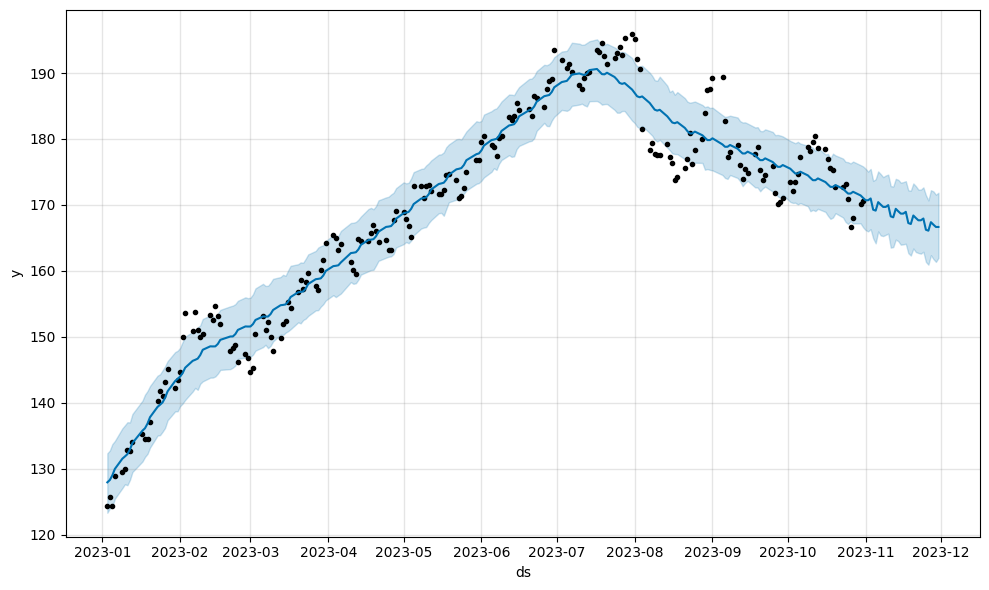

In [ ]:
fig = model_AAPL.plot(forecast)

- Plotando os componentes

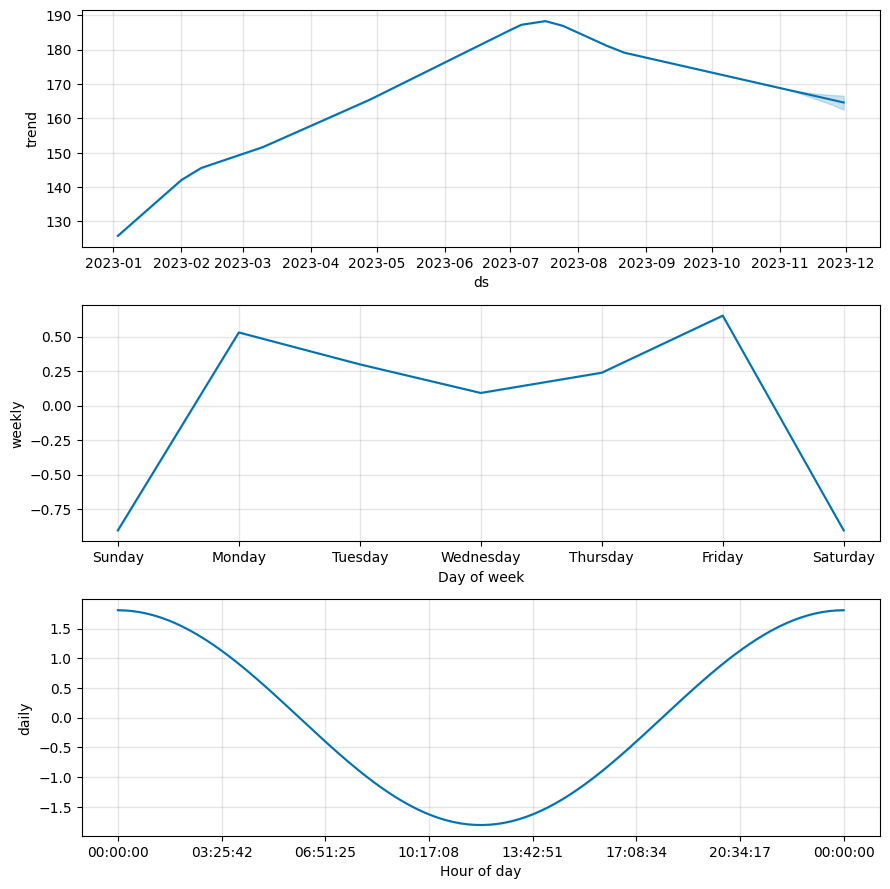

In [ ]:
fig2 = model_AAPL.plot_components(forecast)

- Analisando pontos de mudança

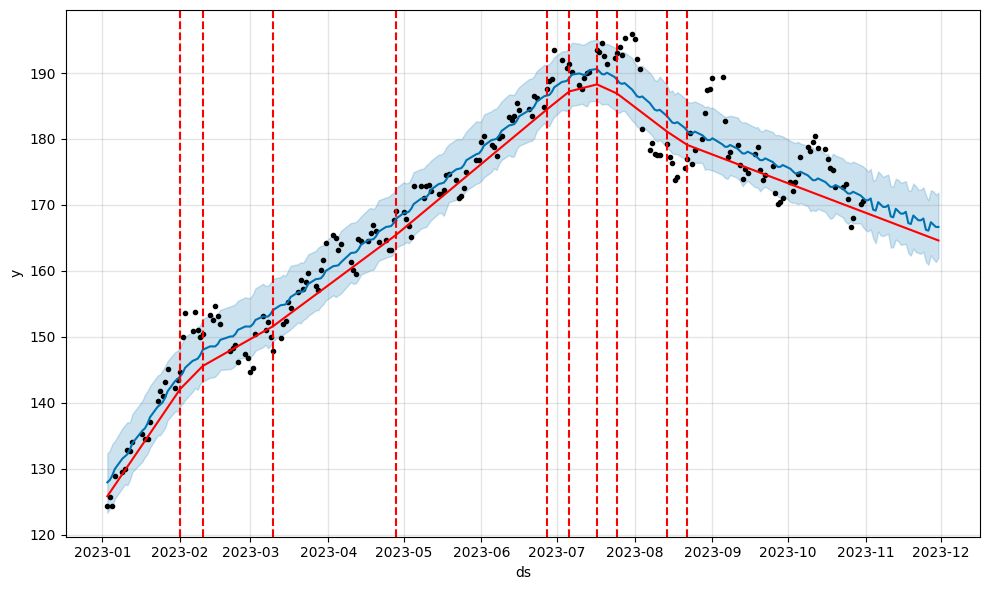

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_AAPL.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_AAPL, forecast)

Apple - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 272.2321104309378
MSRE da previsão: 16.499457882940813
MAE da previsão: 12.939173867155883


#### AMAZON

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_AAPL","y_AMZN":"y"})

In [ ]:
data_adj_close_and_date.head()

,ds,y_AAPL,y,y_GOOGL,y_META,y_MSFT,y_NVDA,y_TSLA
,,,,,,,,
0,2023-01-03,124.374802,85.820000,89.120003,124.739998,237.474350,143.086502,108.099998
1,2023-01-04,125.657639,85.139999,88.080002,127.370003,227.086456,147.424591,113.639999
2,2023-01-05,124.325081,83.120003,86.199997,126.940002,220.356125,142.586731,110.339996
3,2023-01-06,128.899521,86.080002,87.339996,130.020004,222.953079,148.524109,113.059998
4,2023-01-09,129.426559,87.360001,88.019997,129.470001,225.123840,156.210693,119.769997


In [ ]:
model_AMZN = Prophet()
model_AMZN.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_AMZN.fit(data_adj_close_and_date[['ds', 'y']])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/mmoqjb_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/5se1a18_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91628', 'data', 'file=/tmp/tmplb63cz0k/mmoqjb_h.json', 'init=/tmp/tmplb63cz0k/5se1a18_.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_modeln2qwwfcp/prophet_model-20231214114635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_AMZN.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,120.692579,115.532488,126.094055
235,2023-11-27,122.955394,118.024245,128.045706
236,2023-11-28,122.476985,116.914908,127.621433
237,2023-11-29,122.028329,117.031314,127.430896
238,2023-11-30,122.186705,117.346239,127.306576


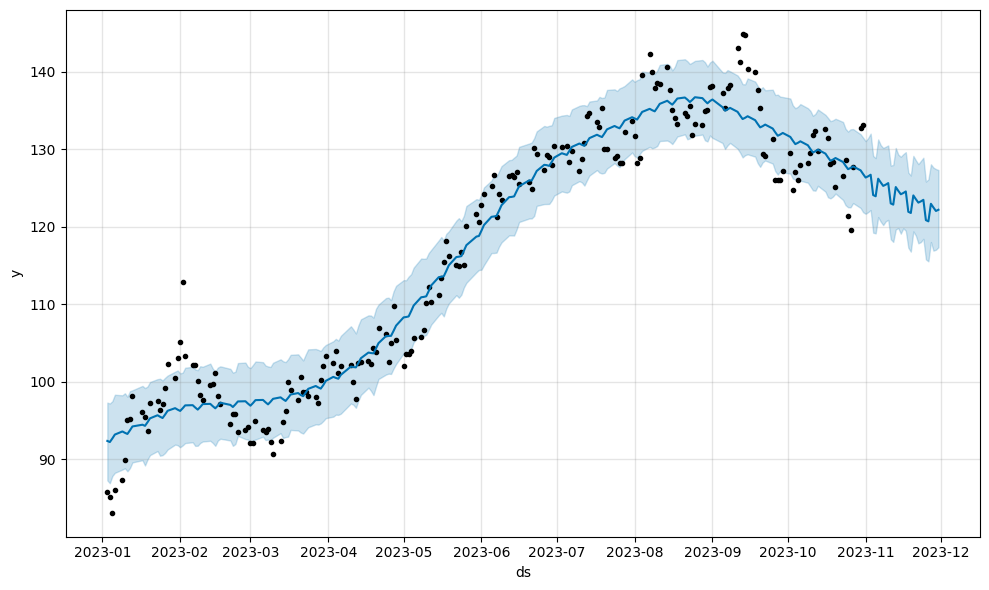

In [ ]:
fig = model_AMZN.plot(forecast)

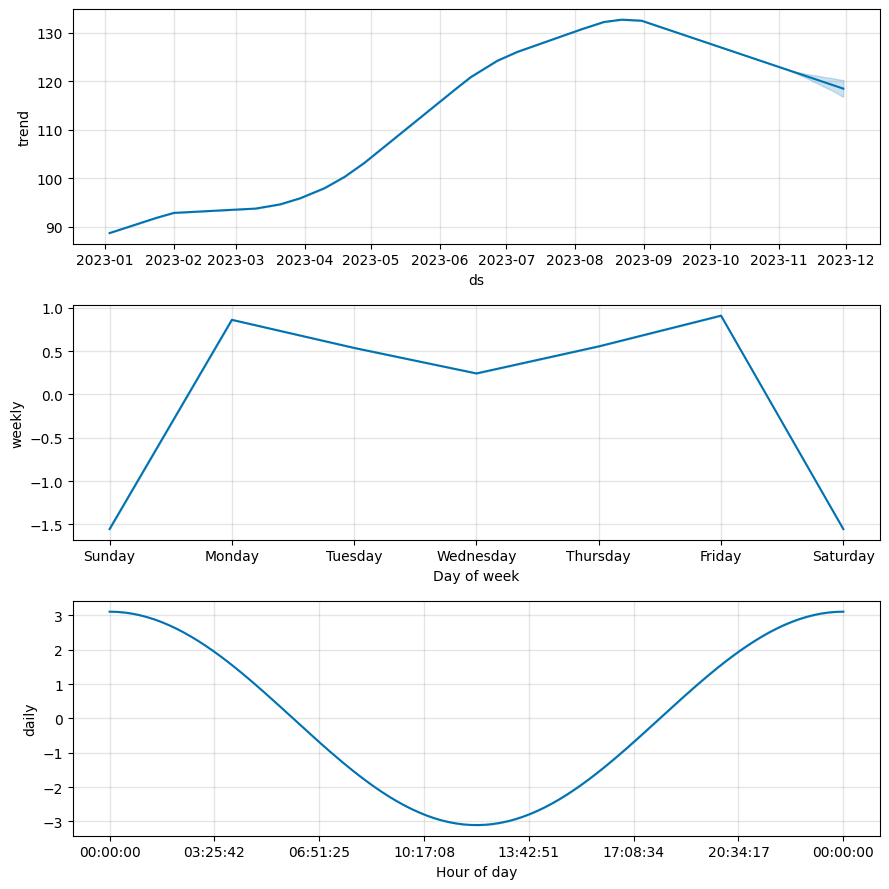

In [ ]:
fig2 = model_AMZN.plot_components(forecast)

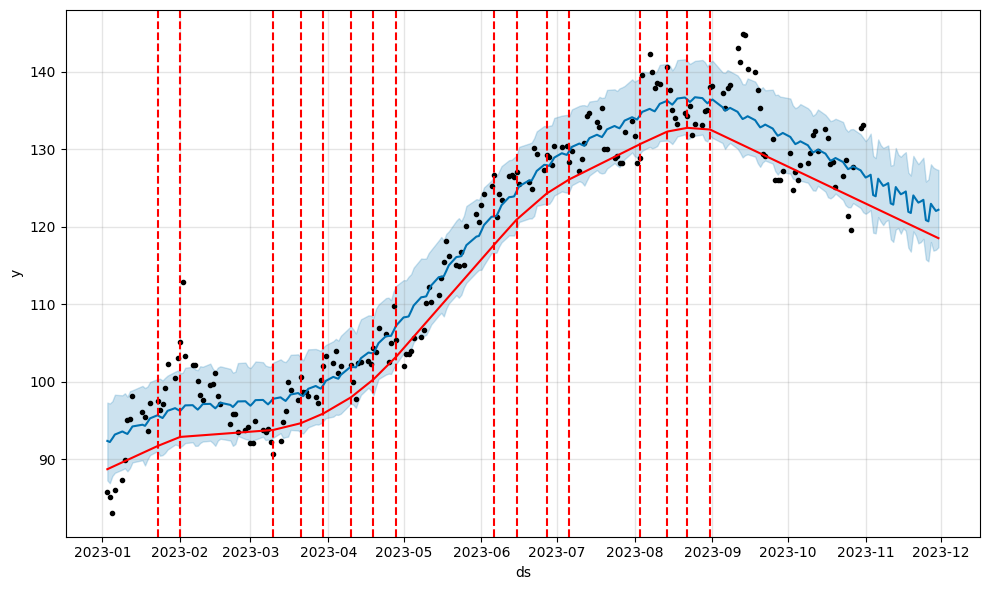

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_AMZN.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_AMZN, forecast)

### Amazon - MRE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 2917.1254160244857
MSRE da previsão: 54.01041951350207
MAE da previsão: 44.62098312636995


#### GOOGLE


In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_AMZN","y_GOOGL":"y"})

In [ ]:
data_adj_close_and_date.head()

,ds,y_AAPL,y_AMZN,y,y_META,y_MSFT,y_NVDA,y_TSLA
,,,,,,,,
0,2023-01-03,124.374802,85.820000,89.120003,124.739998,237.474350,143.086502,108.099998
1,2023-01-04,125.657639,85.139999,88.080002,127.370003,227.086456,147.424591,113.639999
2,2023-01-05,124.325081,83.120003,86.199997,126.940002,220.356125,142.586731,110.339996
3,2023-01-06,128.899521,86.080002,87.339996,130.020004,222.953079,148.524109,113.059998
4,2023-01-09,129.426559,87.360001,88.019997,129.470001,225.123840,156.210693,119.769997


In [ ]:
model_GOOGL = Prophet()
model_GOOGL.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_GOOGL.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/_sl6kcwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/0dncwn97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6724', 'data', 'file=/tmp/tmplb63cz0k/_sl6kcwh.json', 'init=/tmp/tmplb63cz0k/0dncwn97.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_model76wcwuth/prophet_model-20231214114638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_GOOGL.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,135.792474,129.792364,141.781260
235,2023-11-27,136.576206,130.805035,142.258800
236,2023-11-28,136.699457,130.676163,142.597459
237,2023-11-29,136.502131,130.545259,142.464588
238,2023-11-30,137.056791,131.164354,142.908225


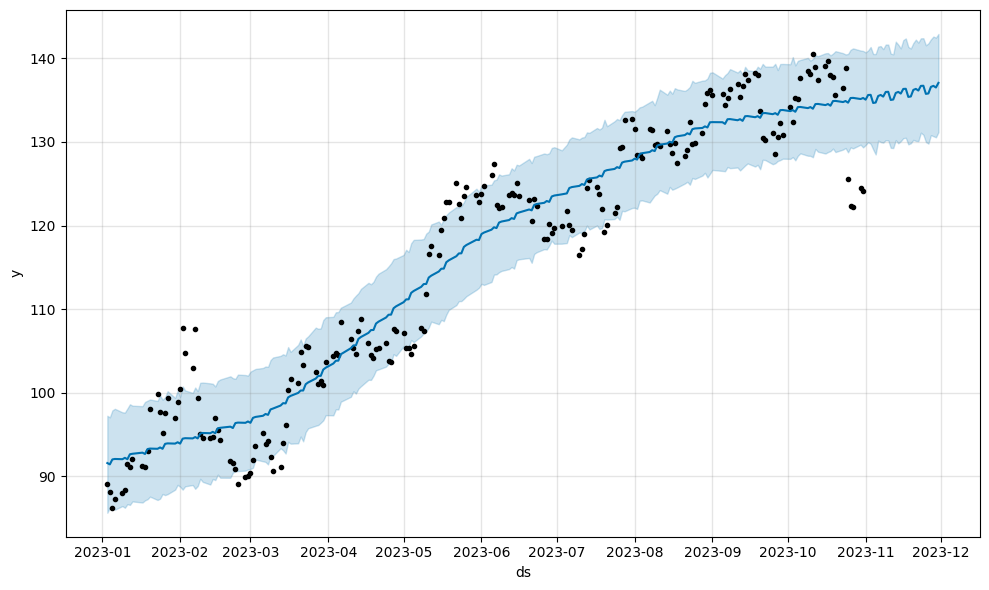

In [ ]:
fig = model_GOOGL.plot(forecast)

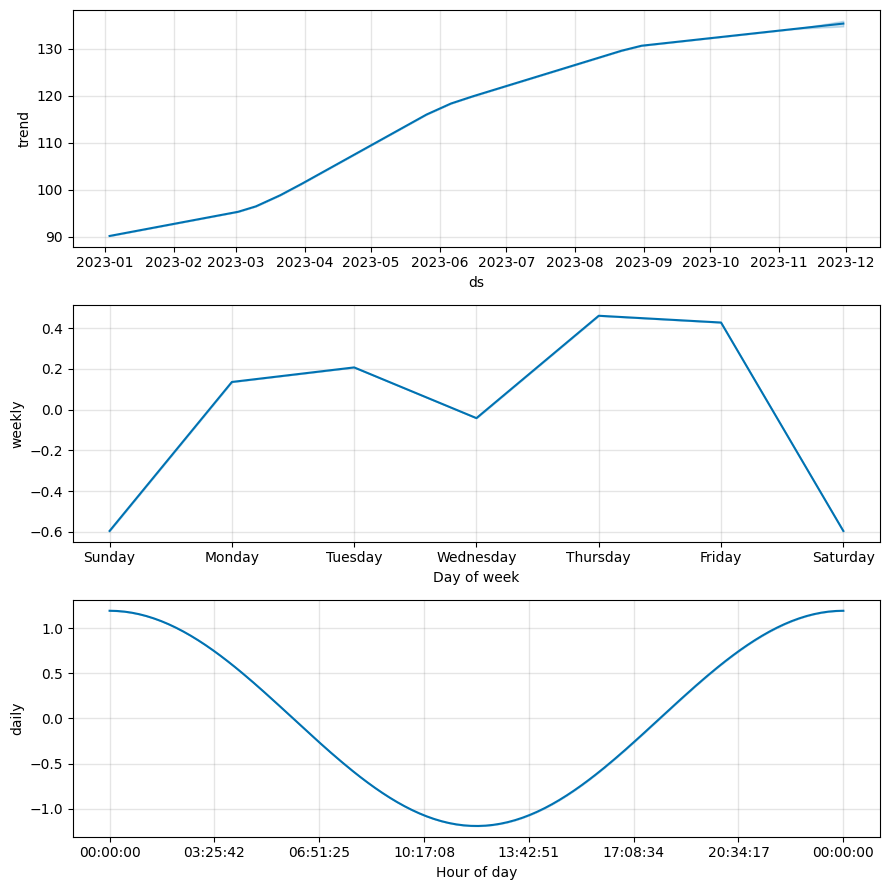

In [ ]:
fig2 = model_GOOGL.plot_components(forecast)

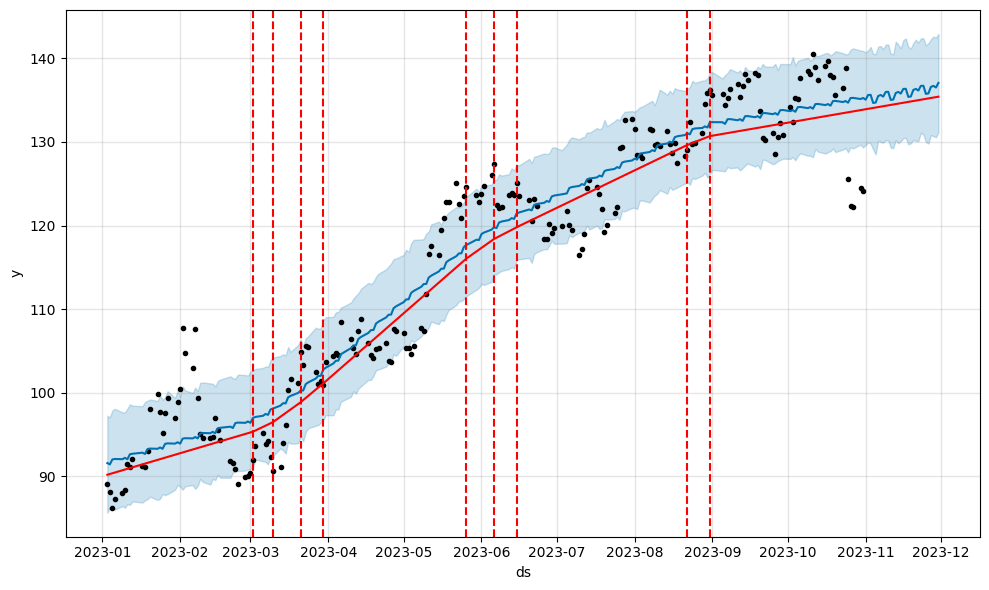

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_GOOGL.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_GOOGL, forecast)

### Google - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 1810.1983514164651
MSRE da previsão: 42.54642583597904
MAE da previsão: 35.163595862432125


#### META

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_GOOGL","y_META":"y"})

In [ ]:
model_META = Prophet()
model_META.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_META.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/jtxtnnpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/i6udws06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38842', 'data', 'file=/tmp/tmplb63cz0k/jtxtnnpd.json', 'init=/tmp/tmplb63cz0k/i6udws06.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_modelwvjp8_0x/prophet_model-20231214114641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_META.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,308.150324,295.171359,319.318835
235,2023-11-27,310.010447,298.029031,322.349882
236,2023-11-28,310.175891,298.843947,321.617689
237,2023-11-29,309.284767,298.184227,321.138370
238,2023-11-30,310.748332,299.792484,322.869845


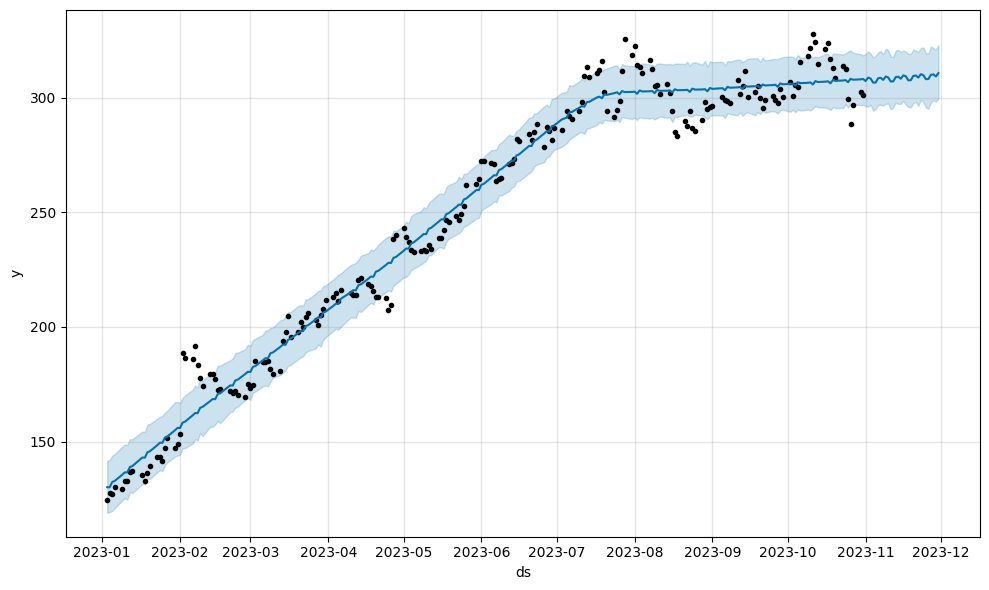

In [ ]:
fig = model_META.plot(forecast)

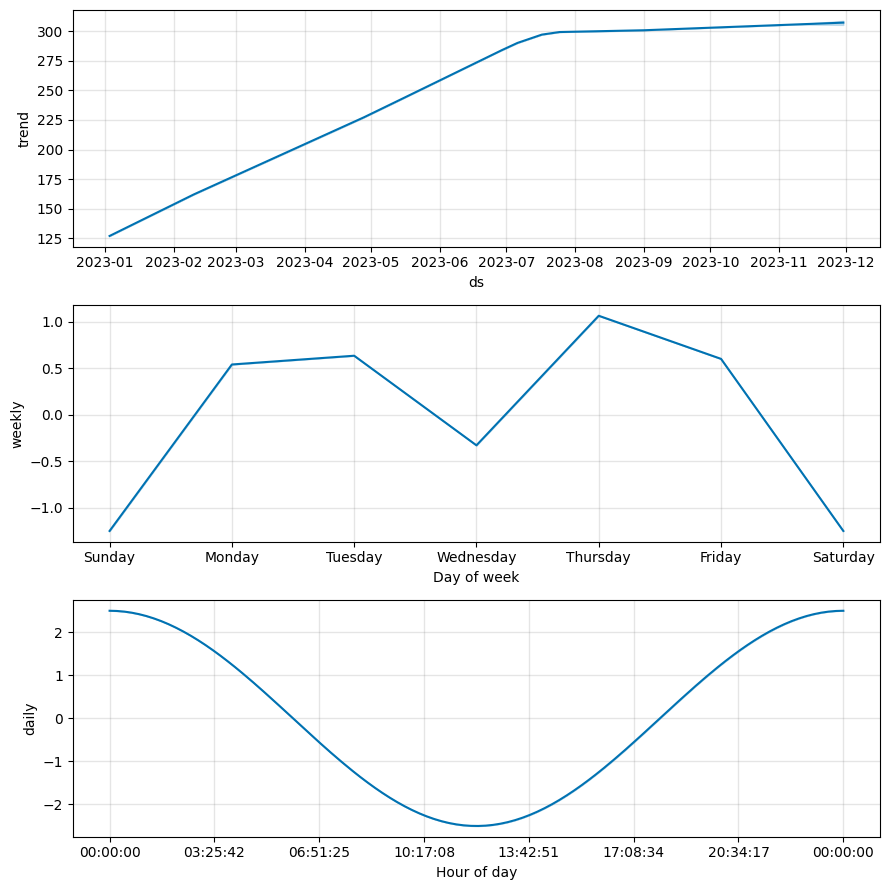

In [ ]:
fig2 = model_META.plot_components(forecast)

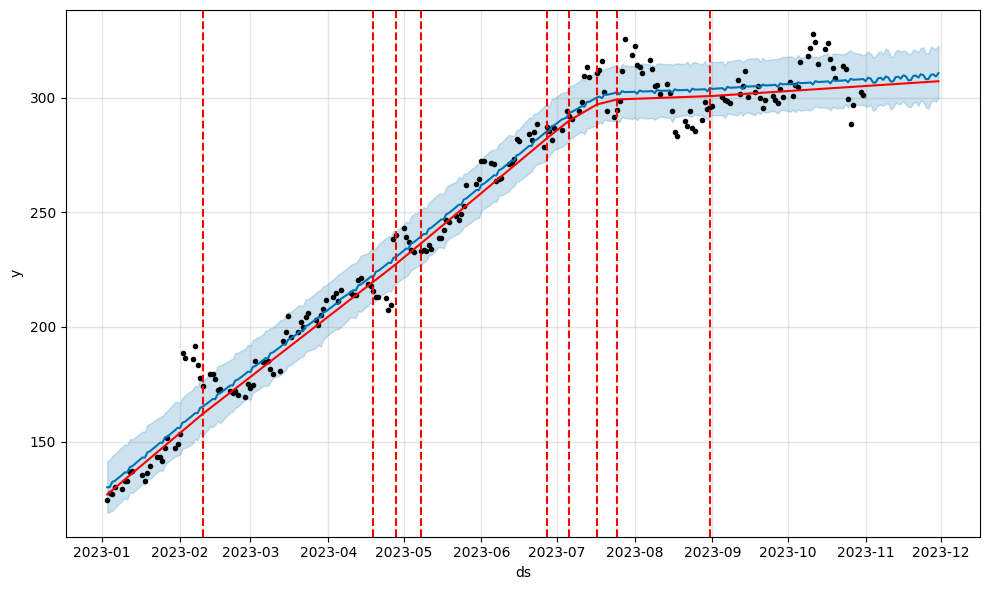

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_META.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_META, forecast)

Meta - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 10028.893395560766
MSRE da previsão: 100.14436277475016
MAE da previsão: 83.0977435641776


#### MICROSOFT

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_META","y_MSFT":"y"})

In [ ]:
data_adj_close_and_date.head()

,ds,y_AAPL,y_AMZN,y_GOOGL,y_META,y,y_NVDA,y_TSLA
,,,,,,,,
0,2023-01-03,124.374802,85.820000,89.120003,124.739998,237.474350,143.086502,108.099998
1,2023-01-04,125.657639,85.139999,88.080002,127.370003,227.086456,147.424591,113.639999
2,2023-01-05,124.325081,83.120003,86.199997,126.940002,220.356125,142.586731,110.339996
3,2023-01-06,128.899521,86.080002,87.339996,130.020004,222.953079,148.524109,113.059998
4,2023-01-09,129.426559,87.360001,88.019997,129.470001,225.123840,156.210693,119.769997


In [ ]:
model_MSFT= Prophet()
model_MSFT.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_MSFT.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/eds6tuv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/rpckvm8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86749', 'data', 'file=/tmp/tmplb63cz0k/eds6tuv3.json', 'init=/tmp/tmplb63cz0k/rpckvm8o.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_model78e9huoy/prophet_model-20231214114643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_MSFT.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,329.773483,320.183342,339.579736
235,2023-11-27,327.310437,317.149227,337.120734
236,2023-11-28,327.773736,317.523253,337.087000
237,2023-11-29,327.204582,318.042836,337.383285
238,2023-11-30,328.150262,317.961060,338.019931


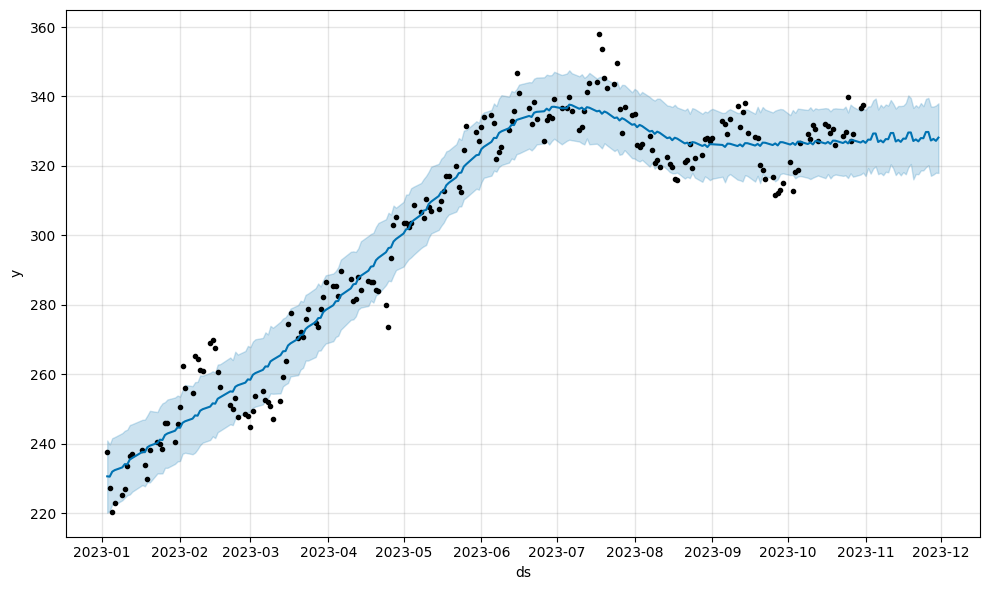

In [ ]:
fig =model_MSFT.plot(forecast)

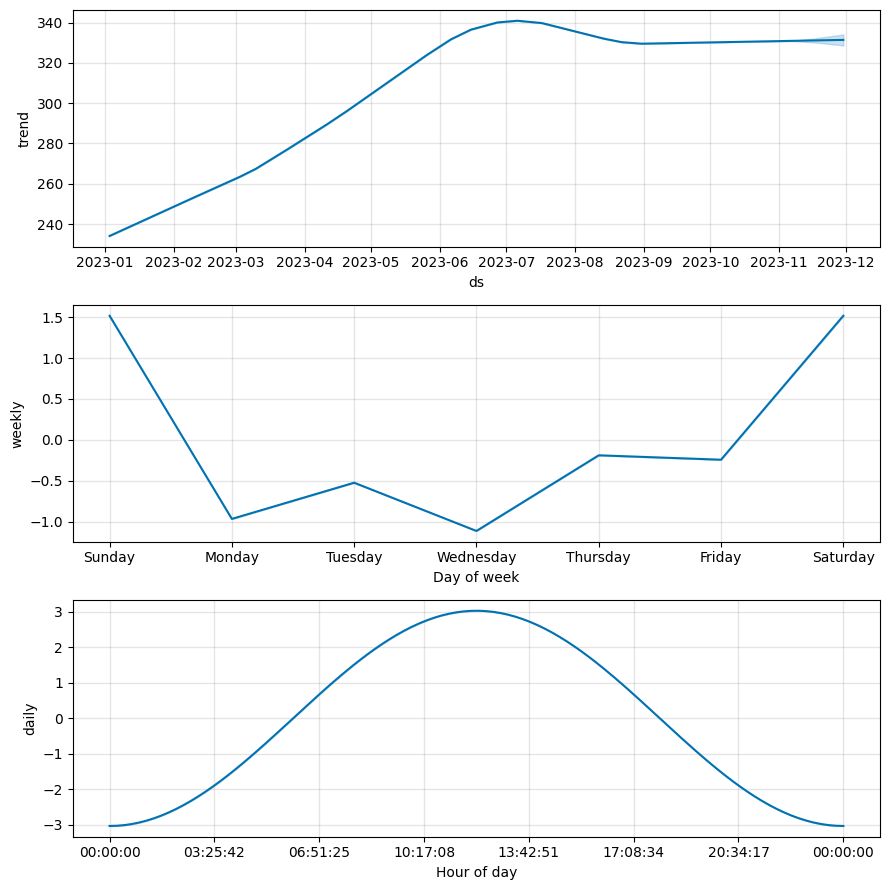

In [ ]:
fig2 = model_MSFT.plot_components(forecast)

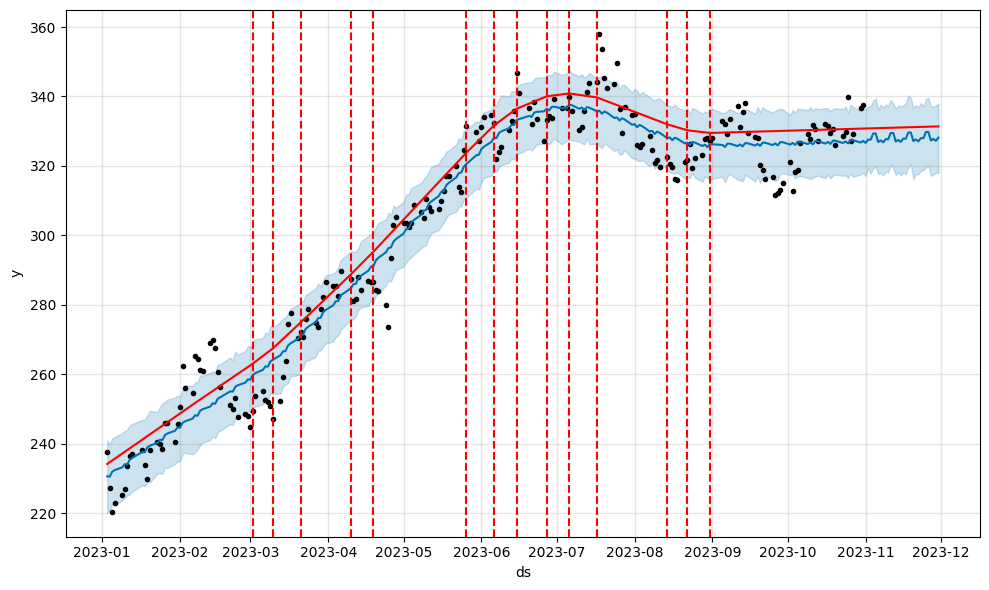

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_MSFT.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_MSFT, forecast)

### Microsoft - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 14611.321798899546
MSRE da previsão: 120.87730059403025
MAE da previsão: 100.3179665728575


#### NVIDIA

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_MSFT","y_NVDA":"y"})

In [ ]:
model_NVDA= Prophet()
model_NVDA.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_NVDA.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/wqwjx9s1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/hucwqgwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7851', 'data', 'file=/tmp/tmplb63cz0k/wqwjx9s1.json', 'init=/tmp/tmplb63cz0k/hucwqgwr.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_modelfzgpt7cc/prophet_model-20231214114650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_NVDA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,410.706048,387.151927,434.098674
235,2023-11-27,415.908072,391.300642,439.210443
236,2023-11-28,417.169438,393.564208,442.495184
237,2023-11-29,414.941696,390.410387,440.218480
238,2023-11-30,416.935154,395.041435,440.092374


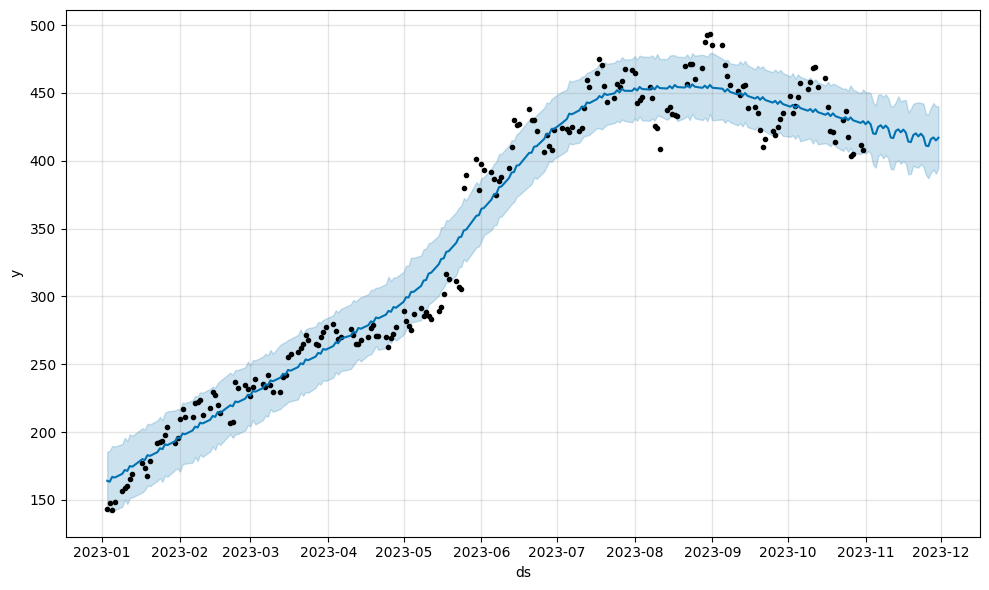

In [ ]:
fig = model_NVDA.plot(forecast)

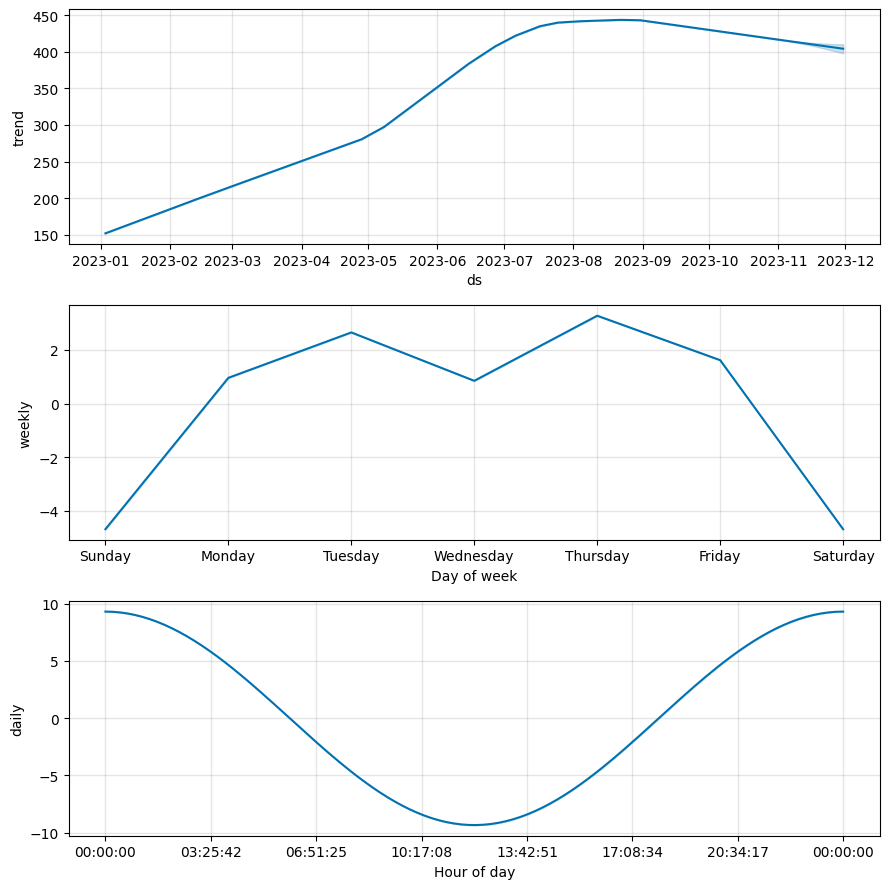

In [ ]:
fig2 = model_NVDA.plot_components(forecast)

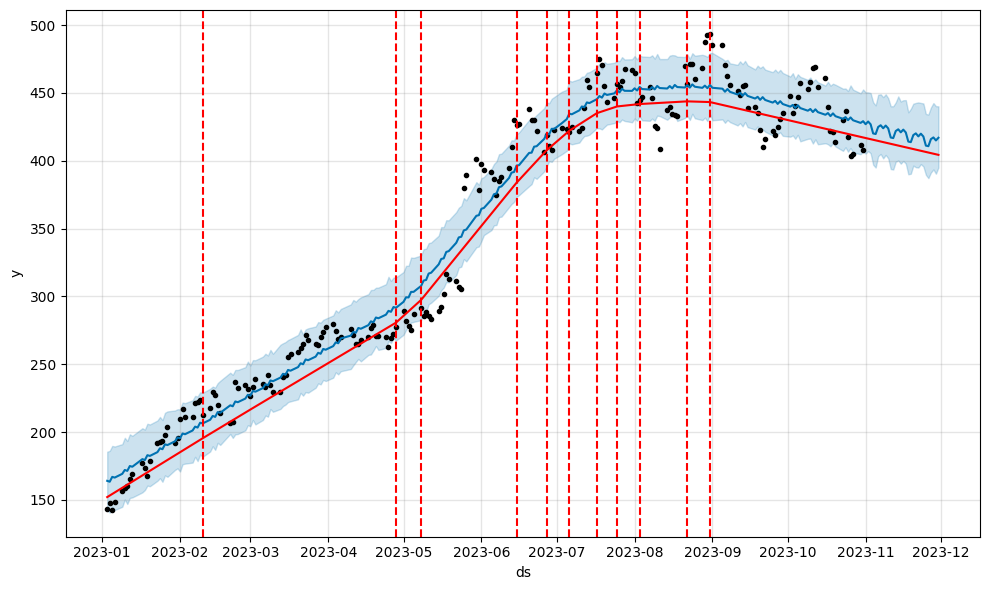

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_NVDA.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_NVDA, forecast)

### Nvidia - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 35066.43169107424
MSRE da previsão: 187.26033133334525
MAE da previsão: 155.39177999548642


#### TESLA

In [ ]:
data_adj_close_and_date = data_adj_close_and_date.rename(columns={"y":"y_NVDA","y_TSLA":"y"})

In [ ]:
model_TSLA= Prophet()
model_TSLA.add_seasonality(name='daily', period=1, fourier_order=1)  # Adicione sazonalidade diária se necessário
model_TSLA.fit(data_adj_close_and_date[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/3bm0_a2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/vr1hexnl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62385', 'data', 'file=/tmp/tmplb63cz0k/3bm0_a2z.json', 'init=/tmp/tmplb63cz0k/vr1hexnl.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_modelhgttenor/prophet_model-20231214114658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model_TSLA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2023-11-26,229.235115,197.862170,261.583071
235,2023-11-27,241.244071,210.409850,271.977441
236,2023-11-28,241.127851,209.288310,270.861543
237,2023-11-29,241.723833,212.181124,271.658104
238,2023-11-30,240.101171,205.880006,270.252056


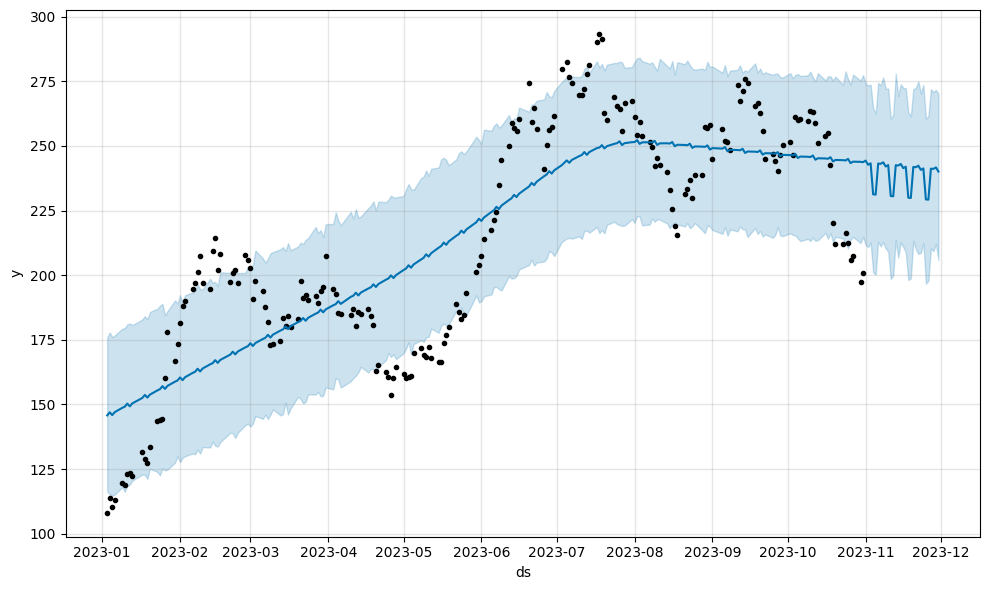

In [ ]:
fig = model_TSLA.plot(forecast)

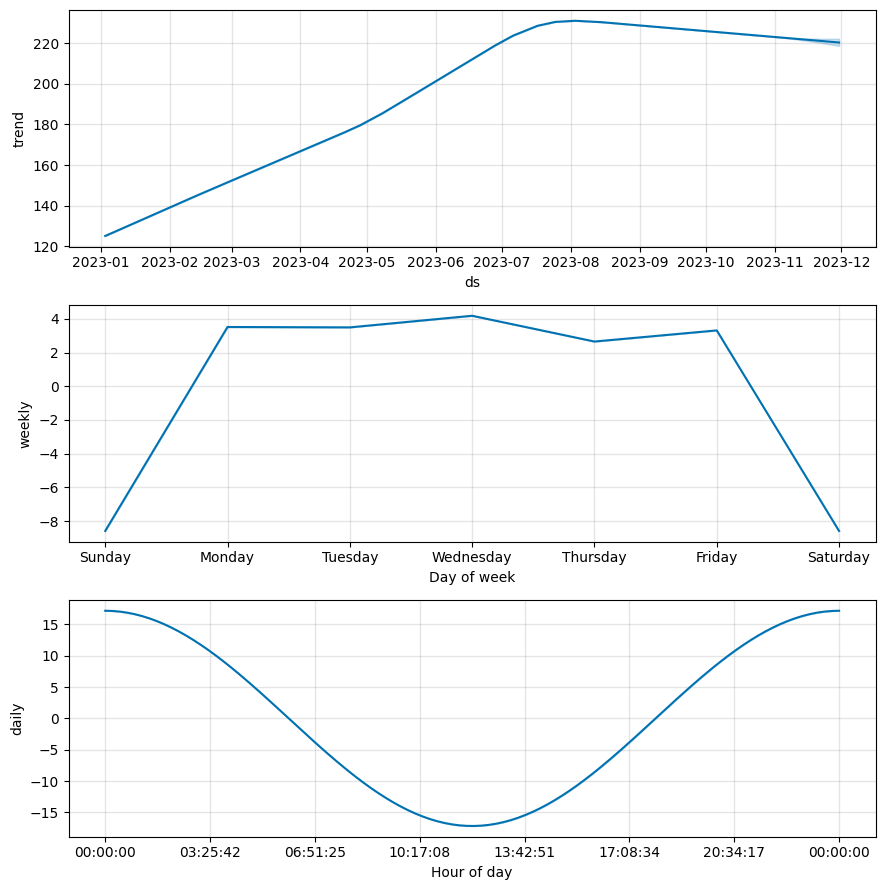

In [ ]:
fig2 = model_TSLA.plot_components(forecast)

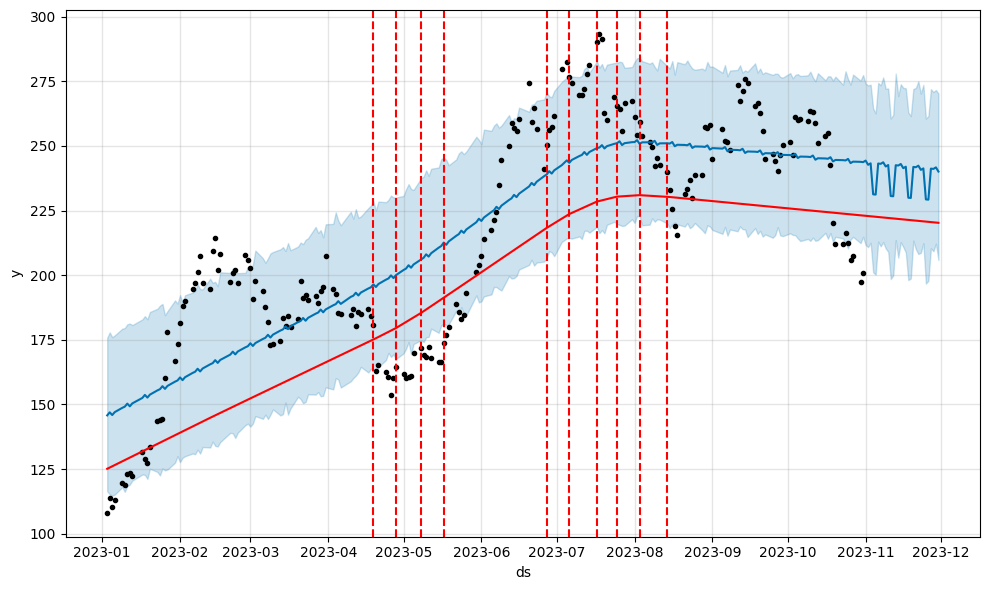

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model_TSLA.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_TSLA, forecast)

### Tesla - MSE, MSRE e MAE

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")

MSE da previsão: 925.8094921181571
MSRE da previsão: 30.42711770967071
MAE da previsão: 24.912206084714697


## Esboço efeito "BadNews" usando  Holidays

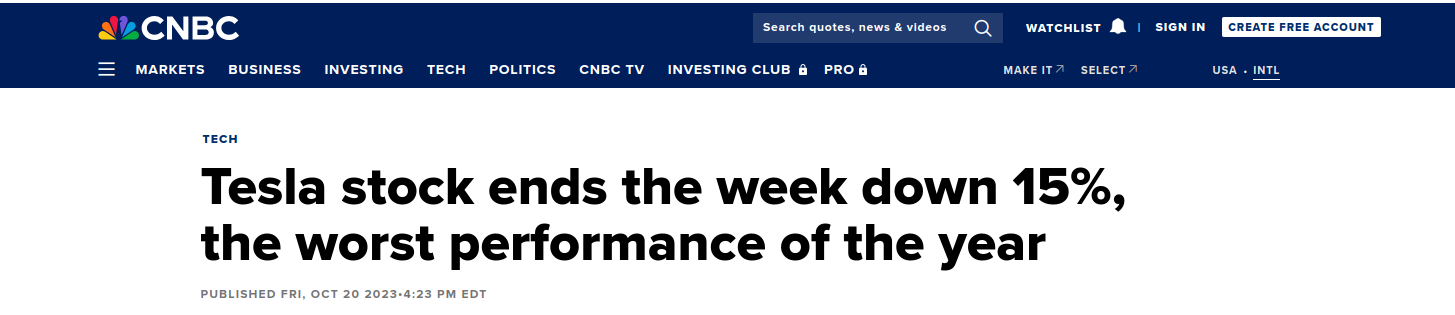

#### Objetivos :

Quero tentar precificar a reação do mercado a uma determinada ação com uma notícia ruim , nesse exemplo na semana do 20 de outubro desse ano as ações da tesla caíram mais de 15% , portanto irei setar manualmente essa semana como um holiday e ver as mudanças nas previsões e componentes da série temporal .

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/qjg3y497.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb63cz0k/_xrzg4y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43862', 'data', 'file=/tmp/tmplb63cz0k/qjg3y497.json', 'init=/tmp/tmplb63cz0k/_xrzg4y3.json', 'output', 'file=/tmp/tmplb63cz0k/prophet_models5uod167/prophet_model-20231214114707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:47:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:47:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


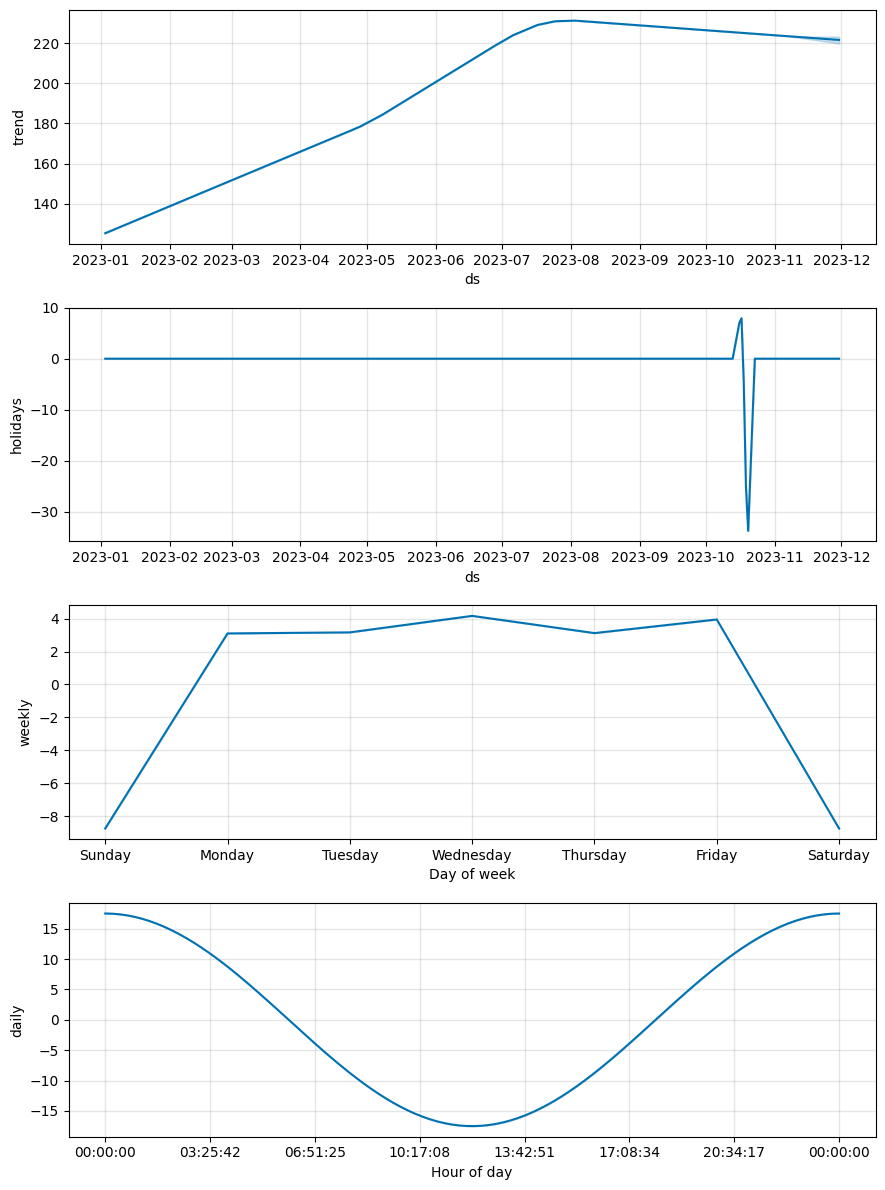

In [ ]:
# Criando um DataFrame de feriados para a data '2023-10-16'
feriado_semana = pd.DataFrame({
    'holiday': 'feriado_semana',
    'ds': pd.to_datetime(['2023-10-16']),
    'lower_window': 0,
    'upper_window': 6,
})

# Criando uma instância do modelo Prophet com a componente 'holidays'
model_TSLA = Prophet(holidays=feriado_semana)

# Adicionando uma sazonalidade diária (opcional)
model_TSLA.add_seasonality(name='daily', period=1, fourier_order=1)

# Ajustando o modelo aos dados
model_TSLA.fit(data_adj_close_and_date[['ds', 'y']])
forecast = model_TSLA.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Plotando os componentes, incluindo feriados
model_TSLA.plot_components(forecast)
plt.show()

In [ ]:
forecast_examination = forecast[(forecast['ds'] > '2023-10-31') & (forecast['ds'] <= test['Date'].iloc[-1])]['trend']

print(f"MSE da previsão: {MSE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MSRE da previsão: {MSRE(test_examination['Adj Close']['AAPL'], forecast_examination)}")
print(f"MAE da previsão: {MAE(test_examination['Adj Close']['AAPL'], forecast_examination)}")


MSE da previsão: 979.8968734054424
MSRE da previsão: 31.30330451255015
MAE da previsão: 25.661145770459182


In [ ]:
feriados_incluidos = model_TSLA.holidays
print("Feriados incluídos no modelo:")
print(feriados_incluidos)

Feriados incluídos no modelo:
          holiday         ds  lower_window  upper_window
0  feriado_semana 2023-10-16             0             6
